# Tweet Ideation: Suicide or Not Suicide

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Suicide_Ideation_Dataset(Twitter-based).csv')
df

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post
...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post
1783,Starting my day out with a positive attitude! ...,Not Suicide post
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post
1785,2 drunken besties stumble into my room and we ...,Not Suicide post


# Data Cleaning

In [3]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

def remove_spec(text):
    #remove punctuations and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # Remove @usernames
    text = re.sub(r'@\w+', '', text)
    
    # Remove HTTP links
    text = re.sub(r'http\S+', '', text)
    
    # Remove extra whitespace and trim the text
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Convert text to lowercase (optional)
    text = text.lower()
    return text

def remove_stopwords(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Get the list of English stopwords
    stop_words = set(stopwords.words('english'))
    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word not in stop_words]
    # Reconstruct the text from the filtered words
    filtered_text = ' '.join(filtered_words)
    return filtered_text

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

def stem(text):
    stemmer = PorterStemmer()
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

def normalize_text(text):
    text = str(text)
    text = remove_spec(text)
    text = remove_stopwords(text)
    text = stem(text)
    text = lemmatize(text)
    return text


In [5]:
df['Tweet_clean']=df['Tweet'].apply(normalize_text)

In [6]:
def get_nb_words(x):
    N = len(x.split())
    if N==0:
        return -1
    else:
        return N
df['Word_in_tweet']=df['Tweet_clean'].apply(get_nb_words)
(df['Word_in_tweet']==-1).sum()

1

In [7]:
df_clean = df[df['Word_in_tweet']>=7]
df_clean

,Tweet,Suicide,Tweet_clean,Word_in_tweet
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post,dizzyhrvi crap took forev put togeth iâm go go...,11
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post,jnaylor kiwitweet hey jer sinc start twitter,7
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post,tri quotdelici librari quot mix result bar cod...,18
5,"@ValenValdez Oh, that's good to hear. But is i...",Not Suicide post,valenvaldez oh that good hear alreadi youll co...,10
6,@mcm180 u've got a list for fellow #hotties? Y...,Not Suicide post,mcm uve got list fellow hotti gon na share one...,11
...,...,...,...,...
1779,some days i feel deeply depressed i am a highl...,Potential Suicide post,day feel deepli depress highli sensit person d...,52
1781,standing in supermarket line and thinking how ...,Potential Suicide post,stand supermarket line think feel jump high st...,98
1783,Starting my day out with a positive attitude! ...,Not Suicide post,start day posit attitud great watch great,7
1785,2 drunken besties stumble into my room and we ...,Not Suicide post,drunken besti stumbl room run around sober cj ...,14


In [8]:
X = df_clean['Tweet_clean']
y = df_clean['Suicide'].astype('category').replace({'Not Suicide post':0,'Potential Suicide post ':1})

# Exploratory Data Analysis

In [9]:
df_clean[['Word_in_tweet']][df['Suicide']=='Potential Suicide post '].describe()

/tmp/ipykernel_3744/2932515384.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean[['Word_in_tweet']][df['Suicide']=='Potential Suicide post '].describe()


,Word_in_tweet
count,529.000000
mean,17.476371
std,15.530637
min,7.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,115.000000


/tmp/ipykernel_3744/4122574162.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean[['Word_in_tweet']][df['Suicide']=='Potential Suicide post '].boxplot()


<AxesSubplot:>

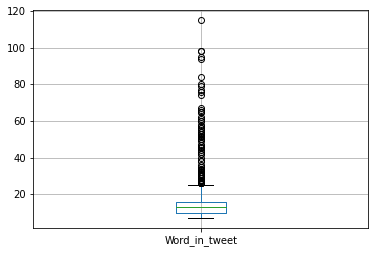

In [10]:
df_clean[['Word_in_tweet']][df['Suicide']=='Potential Suicide post '].boxplot()

/tmp/ipykernel_3744/573288041.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean[['Word_in_tweet']][df['Suicide']!='Potential Suicide post '].boxplot()


<AxesSubplot:>

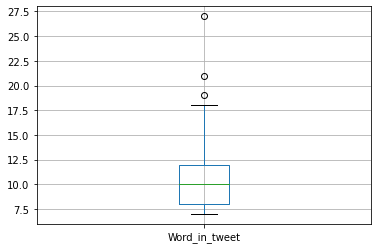

In [11]:
df_clean[['Word_in_tweet']][df['Suicide']!='Potential Suicide post '].boxplot()

In [12]:
import matplotlib.pyplot as plt
def count_words(df):
    word_count = Counter()
    for tweet in df['Tweet_clean']:
        for word in tweet.split():
            word_count[word]=word_count[word]+1
    return word_count
def word_counts_per_class():
    s_count = count_words(df[df['Suicide']=='Not Suicide post'])
    ns_count = count_words(df[df['Suicide']=='Potential Suicide post '])
    return s_count,ns_count

def make_counts(word_counts, top_n=10,label=''):    
    # Sort the word counts by count in descending order and take the top N words
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    # Extract words and their respective counts
    words, counts = zip(*sorted_word_counts)
    
    return words,counts
    
def plot_top_words(word_counts, top_n=10,label=''):
    words, counts=make_counts(word_counts, top_n,label)
    
    # Create a bar chart
    plt.figure(figsize=(6, 3))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.title(f'Top {top_n} Most Common Words - {label}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

def plot_top_words_in_classes(word_counts,ns_count,s_count):
    top_n = 15
    words, counts=make_counts(word_counts, top_n=top_n,label='')
    suicide_counts = []
    nonsuicide_counts = []
    
    for w in words:
        suicide_counts.append(s_count[w])
        nonsuicide_counts.append(-1*ns_count[w])
    plt.figure(figsize=(12,4))
    plt.bar(x=words,height=nonsuicide_counts,color='skyblue',label='Non suicide post')
    plt.bar(x=words,height=suicide_counts,color='gray',label='Suicide post')
    plt.xticks(rotation=45)
    plt.title(f'Top {top_n}most used word')
    plt.legend()
    plt.tight_layout()
    

In [13]:
word_count = count_words(df)
nonsui_count,sui_count = word_counts_per_class()

In [14]:
w,c = make_counts(word_count,10,label=1)

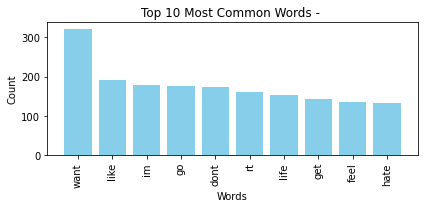

In [15]:
plot_top_words(word_count,top_n=10)

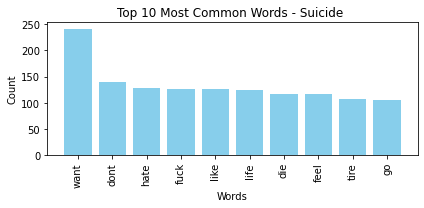

In [16]:
plot_top_words(sui_count,label='Suicide ')

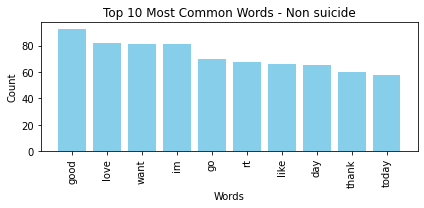

In [17]:
plot_top_words(nonsui_count,label='Non suicide')

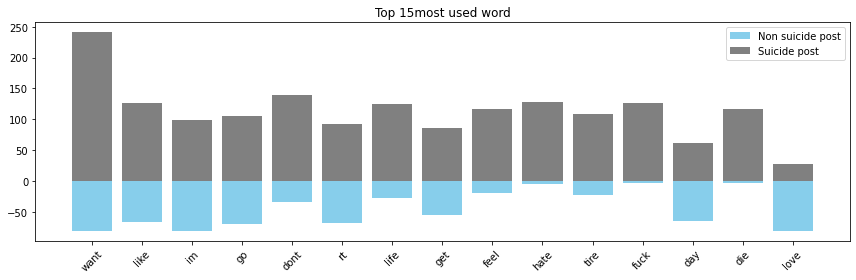

In [18]:
plot_top_words_in_classes(word_count,nonsui_count,sui_count)

# Training the Machine Learning model

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,stratify=y,test_size=0.2,shuffle=True)

In [20]:
from sklearn.model_selection import GridSearchCV,learning_curve
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.preprocessing import RobustScaler

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(ngram_range=(1,1))

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression


preprocessor = make_pipeline(vec,RobustScaler(with_centering=False))

In [21]:
def plot_learning_curve(model,scoring='accuracy'):
    train_sizes, train_scores, validation_scores = learning_curve(model,X_train,Y_train,scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)
    plt.figure(figsize=(7, 4))
    plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1, color="blue")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,validation_scores_mean + validation_scores_std, alpha=0.1, color="red")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="red", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title("Learning Curves")
    plt.show()
    
def evaluate_model(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test,y_pred)
    ConfusionMatrixDisplay(cm,display_labels=['Not Suicide','Suicide']).plot()
    print(classification_report(Y_test,y_pred))
    plot_learning_curve(model,scoring='accuracy')

def tune_hyperparameters(model,grid,scoring='accuracy'):
    gs = GridSearchCV(estimator=model,param_grid=grid,n_jobs=4,scoring=scoring)
    gs.fit(X_train,Y_train)
    print('Best Score: ',gs.best_score_)
    print('Best parameters: ',gs.best_params_)
    evaluate_model(model)
    return gs.best_estimator_

def train_and_eval(estimator):
    steps = [('preprocessor',preprocessor),('estimator',estimator)]
    model = Pipeline(steps=steps)
    model.fit(X_train,Y_train)
    evaluate_model(model)
    return model

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       125
           1       0.92      0.90      0.91       106

    accuracy                           0.92       231
   macro avg       0.92      0.92      0.92       231
weighted avg       0.92      0.92      0.92       231



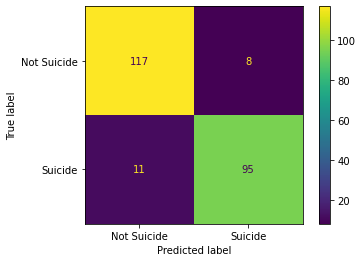

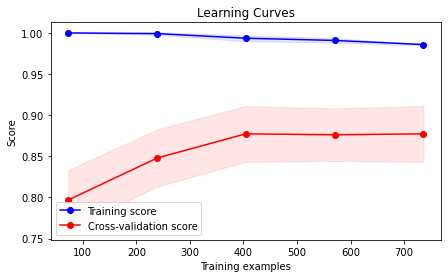

In [22]:
model=train_and_eval(LogisticRegression(class_weight='balanced',n_jobs=4))

Best Score:  0.9007002801120448
Best parameters:  {'estimator__C': 500}
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       125
           1       0.92      0.90      0.91       106

    accuracy                           0.92       231
   macro avg       0.92      0.92      0.92       231
weighted avg       0.92      0.92      0.92       231



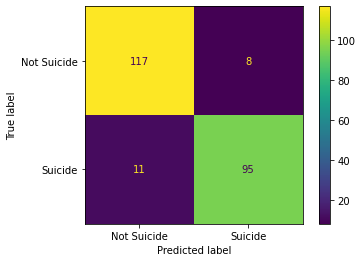

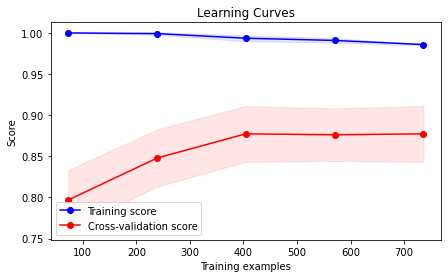

In [23]:
grid = {
    'estimator__C': [0.01,1,5,100,500,900,1200],
}
best_candidate=tune_hyperparameters(model,grid=grid,scoring='recall')

# Training a Support Vector Machine

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       125
           1       0.95      0.90      0.92       106

    accuracy                           0.93       231
   macro avg       0.93      0.93      0.93       231
weighted avg       0.93      0.93      0.93       231



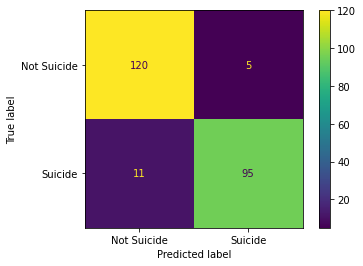

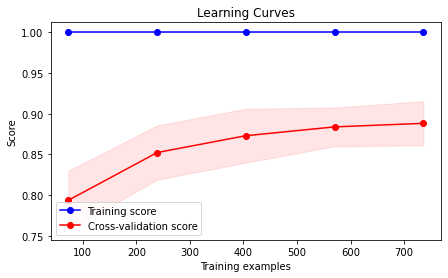

In [24]:
from sklearn.svm import SVC
svm = train_and_eval(SVC(C=1,gamma=1,class_weight='balanced',probability=True))

Best Score:  0.8533333333333333
Best parameters:  {'estimator__C': 4, 'estimator__gamma': 1}
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       125
           1       0.95      0.90      0.92       106

    accuracy                           0.93       231
   macro avg       0.93      0.93      0.93       231
weighted avg       0.93      0.93      0.93       231



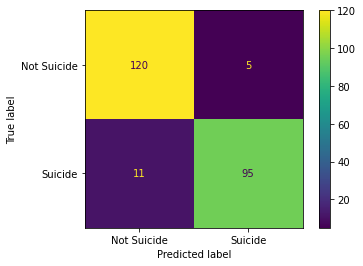

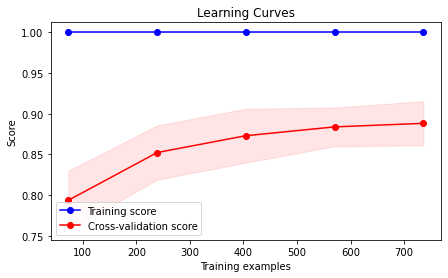

In [25]:
grid = {
    'estimator__C': [4,5,10,20],
    'estimator__gamma': [0.001,1,2]
}
best_svm = tune_hyperparameters(svm,grid,scoring='recall')

# Conclusions:

- With limited numbers of data, we still have good acceptable performance.
- While testing the prediction with some texts, the model performs bad prediction. I seems that sometimes, the classic ml models fails to interpret the vectorized words.
- The major advantage of this model is its low resource consumption and fast inference time.

In [27]:
import joblib
joblib.dump(best_candidate,'model.p')

['model.p']